In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('Fraud.csv')


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


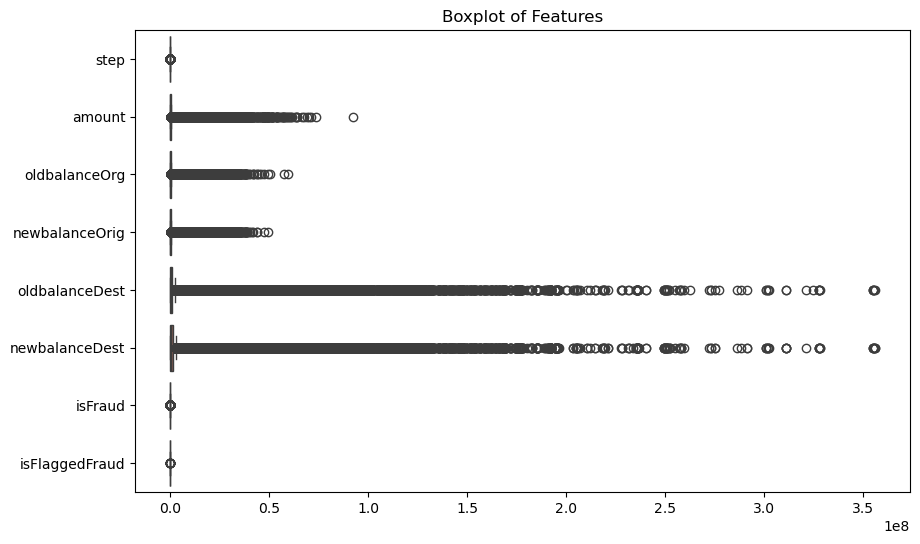

In [7]:
#idetify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features')
plt.show()

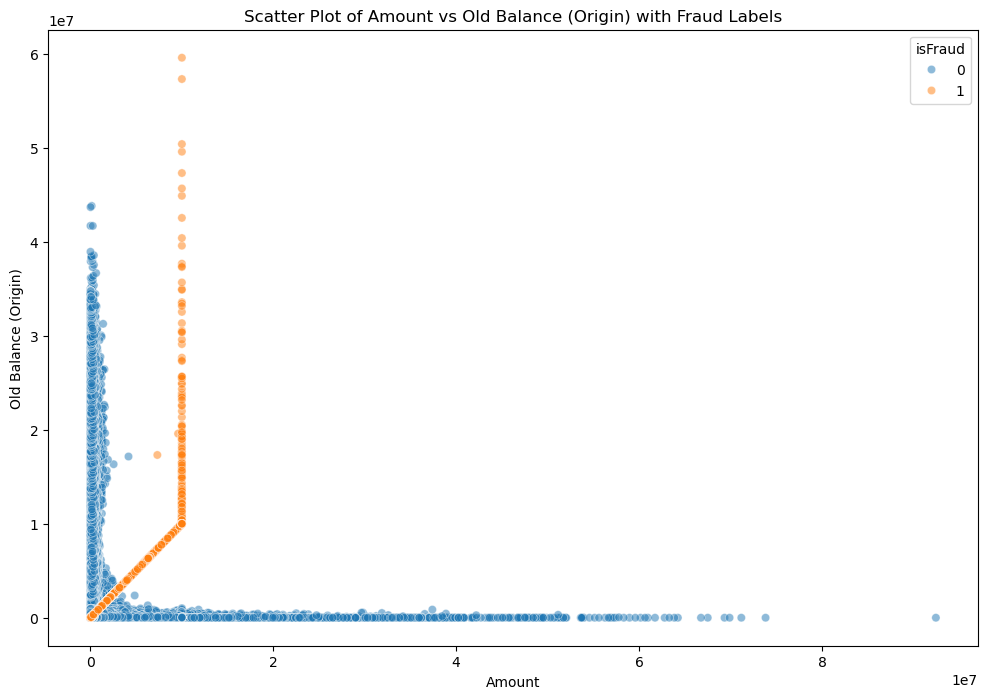

In [8]:
#visualize outliers
plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=df, alpha=0.5)
plt.title('Scatter Plot of Amount vs Old Balance (Origin) with Fraud Labels')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin)')
plt.legend(title='isFraud', loc='upper right')
plt.show()

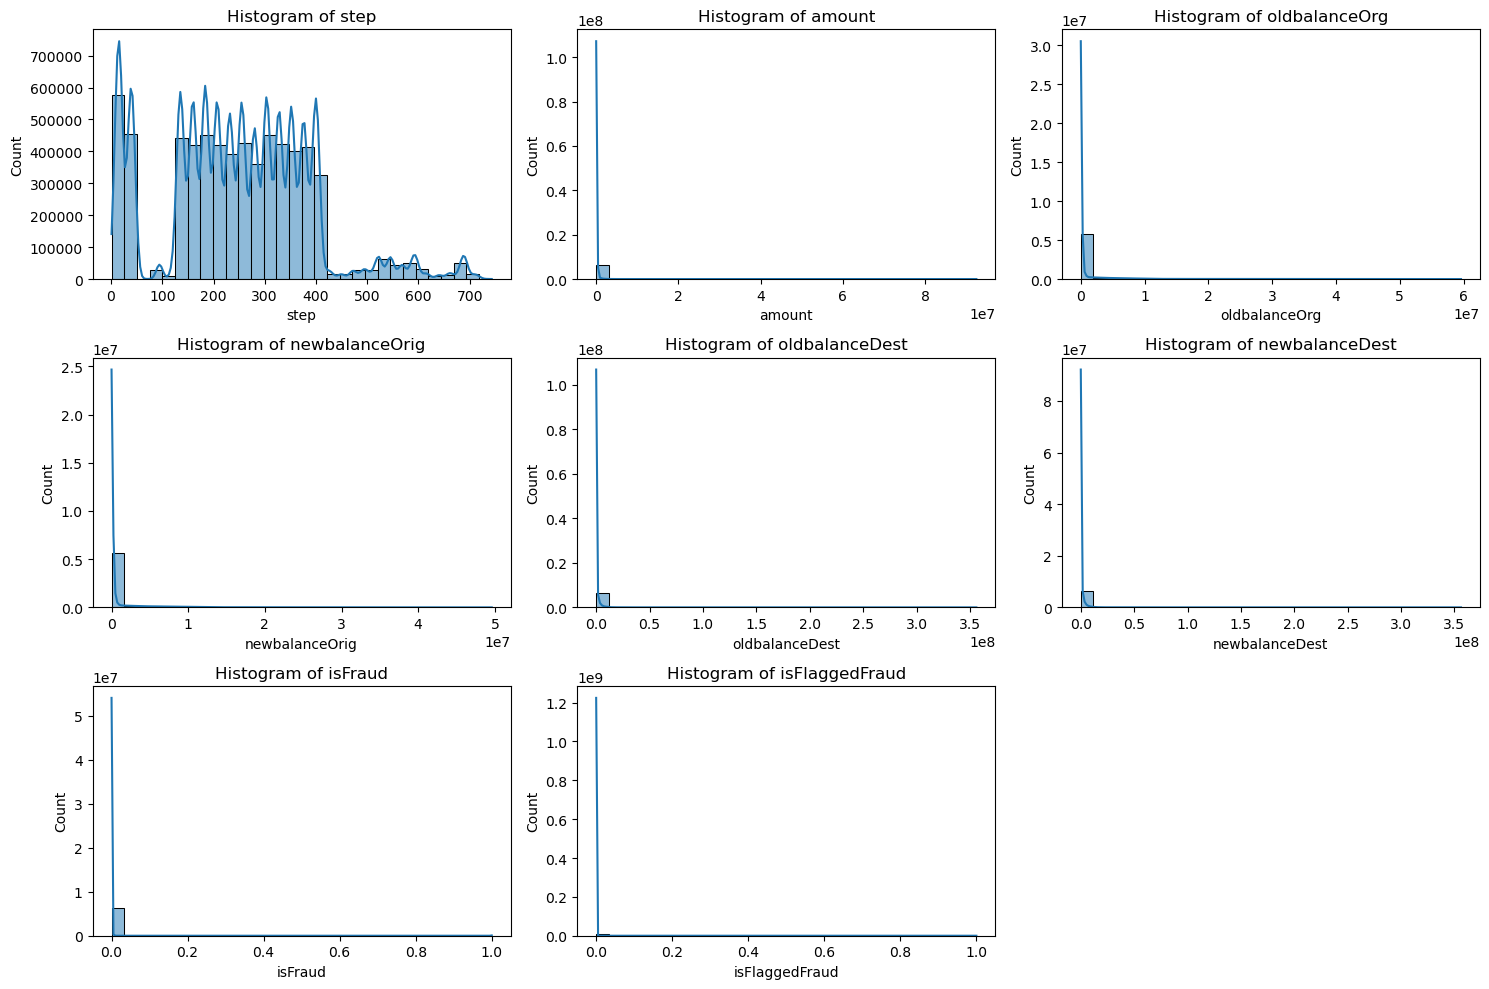

In [9]:
#visualize outliers with histogram of all numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [10]:
df['ratio_amount_to_oldbalance'] = df['amount'] / (df['oldbalanceOrg'] + 1e-6)

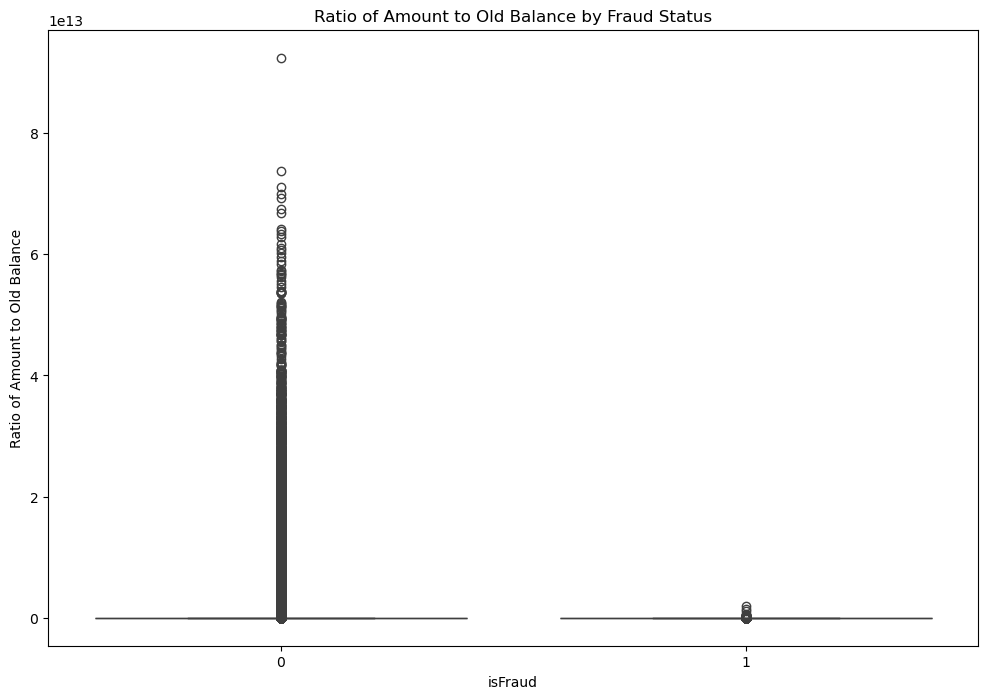

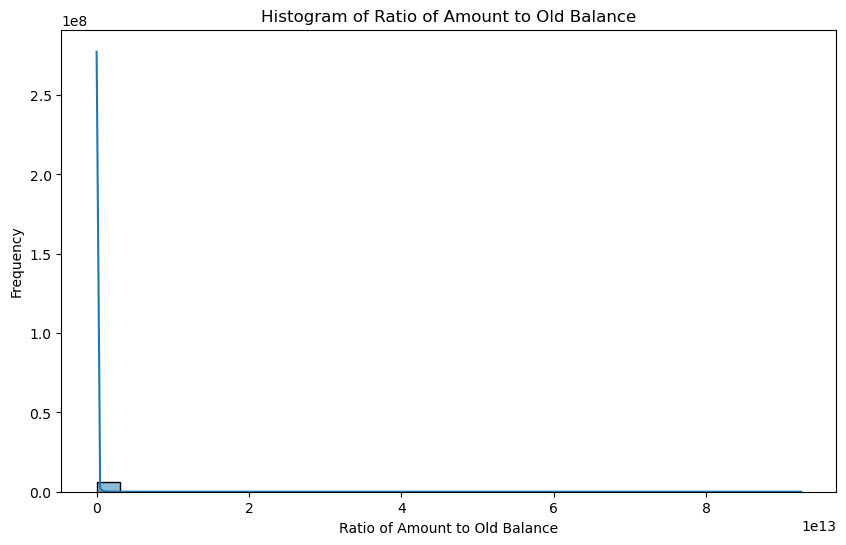

In [11]:
#visualize new feature , separated by isFraud
plt.figure(figsize=(12, 8))
sns.boxplot(x='isFraud', y='ratio_amount_to_oldbalance', data=df)
plt.title('Ratio of Amount to Old Balance by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Ratio of Amount to Old Balance')
plt.show()
#histogram of new feature
plt.figure(figsize=(10, 6))
sns.histplot(df['ratio_amount_to_oldbalance'], bins=30, kde=True)
plt.title('Histogram of Ratio of Amount to Old Balance')
plt.xlabel('Ratio of Amount to Old Balance')
plt.ylabel('Frequency')
plt.show()


In [12]:
#we will have five new columns: type_CASH-IN, type_CASH-OUT, type_DEBIT, type_PAYMENT, and type_TRANSFER.
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)



In [13]:
#balance_change_orig = newbalanceOrig - oldbalanceOrg
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
#balance_change_dest = newbalanceDest - oldbalanceDest
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [14]:
#handling step feature into two new features: day_of week and hour_of_day
df['hour_of_day'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7


In [15]:
#encodding day_of_week and hour_of_day
# Apply sine and cosine transformations for 'hour_of_day'
df['sin_hour'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)
# Step 4: Apply sine and cosine transformations for 'day_of_week'
df['sin_day'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

In [16]:
#The data dictionary notes that there is no balance information for customers who are merchants (nameDest starts with 'M').
#is_merchant_dest, which indicates whether the transaction's recipient is a merchant.
df['is_merchant_dest'] = df['nameDest'].str.startswith('M').astype(int)


In [17]:
#Drop oldbalanceOrg and newbalanceOrig, as you have the balance_change_orig feature.
df.drop(columns=['oldbalanceOrg', 'newbalanceOrig'], inplace=True)

#Drop nameDest, as you have the is_merchant_dest feature which captures the key information from that column.
df.drop(columns=['nameDest'], inplace=True)

#rop the original step column and its intermediary features, keeping only the sine and cosine transformations.
df.drop(columns=['step', 'hour_of_day', 'day_of_week'], inplace=True)

In [18]:
#Log Transformation of Skewed Features
skewed_features = ['amount', 'ratio_amount_to_oldbalance']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])  
    


In [19]:
# Calculate the skewness for the balance_change features
skewness_orig = df['balance_change_orig'].skew()
skewness_dest = df['balance_change_dest'].skew()

print(f"Skewness of balance_change_orig: {skewness_orig}")
print(f"Skewness of balance_change_dest: {skewness_dest}")

Skewness of balance_change_orig: -24.630520480392992
Skewness of balance_change_dest: 32.916340674728005


In [ ]:
df['balance_change_dest_log'] = np.log1p(df['balance_change_dest'])

from scipy.stats import boxcox, yeojohnson

# Applying Yeo-Johnson transformation to balance_change_orig
df['balance_change_orig_yeo'], _ = yeojohnson(df['balance_change_orig'])

c:\Users\EKTA\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EKTA\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
#skewness after transformation
skewness_orig_yeo = df['balance_change_orig_yeo'].skew()
skewness_dest_log = df['balance_change_dest_log'].skew()
print(f"Skewness of balance_change_orig after Yeo-Johnson: {skewness_orig_yeo}")
print(f"Skewness of balance_change_dest after log transformation: {skewness_dest_log}")

Skewness of balance_change_orig after Yeo-Johnson: -19.759116106885024
Skewness of balance_change_dest after log transformation: nan


c:\Users\EKTA\anaconda3\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [ ]:
print("Checking for negative values in 'balance_change_dest' before transformation:")
negative_values = df[df['balance_change_dest'] < 0]['balance_change_dest'].count()
print(f"Number of negative values: {negative_values}")

Checking for negative values in 'balance_change_dest' before transformation:
Number of negative values: 1238864


In [23]:
# Applying Yeo-Johnson transformation to balance_change_dest
df['balance_change_dest_yeo'], _ = yeojohnson(df['balance_change_dest'])

# Check the skewness of the new transformed feature
print("Skewness of balance_change_dest after Yeo-Johnson transformation:")
print(df['balance_change_dest_yeo'].skew())

Skewness of balance_change_dest after Yeo-Johnson transformation:
8.540049080978045


In [24]:
df.columns

Index(['amount', 'nameOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'ratio_amount_to_oldbalance', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_change_orig',
       'balance_change_dest', 'sin_hour', 'cos_hour', 'sin_day', 'cos_day',
       'is_merchant_dest', 'balance_change_dest_log',
       'balance_change_orig_yeo', 'balance_change_dest_yeo'],
      dtype='object')

In [ ]:
df.drop(columns=['nameOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], inplace=True)

In [26]:
#split the data into features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:

from imblearn.over_sampling import SMOTE

# Replace inf/-inf with NaN, then impute missing values in X_train before SMOTE
X_train_clean = X_train.replace([np.inf, -np.inf], np.nan)
X_train_imputed = X_train_clean.fillna(X_train_clean.mean())

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)



In [30]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



In [31]:

# Step 1: Model Training
# Initialize the XGBoost classifier
# The 'use_label_encoder=False' and 'eval_metric="logloss"' are to avoid a future warning
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Fit the model to the oversampled training data
print("Training the XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")


Training the XGBoost model...


c:\Users\EKTA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:16] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete.


In [32]:

# Step 2: Model Evaluation on the original test set
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics
print("\nModel Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))



Model Performance on Test Data:
Accuracy: 0.9997068817562577
Precision: 0.9003783102143758
Recall: 0.8691418137553256
F1-Score: 0.8844843604831217


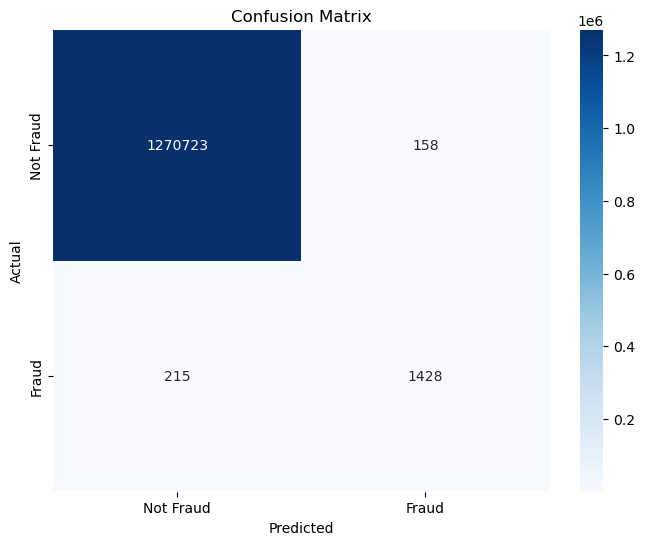

In [33]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


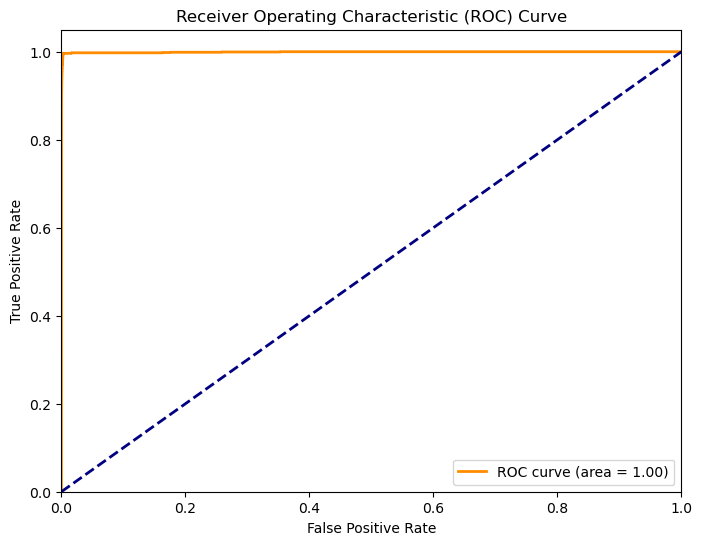

In [34]:

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


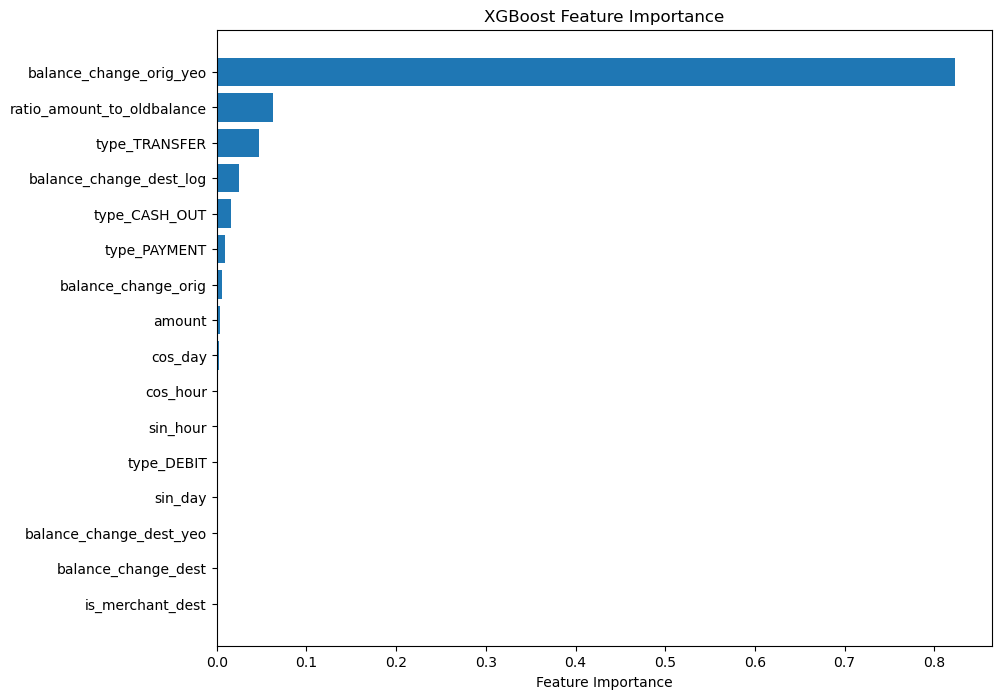


Top 10 most important features:
                       Feature  Importance
14     balance_change_orig_yeo    0.822776
1   ratio_amount_to_oldbalance    0.062724
5                type_TRANSFER    0.047506
13     balance_change_dest_log    0.025002
2                type_CASH_OUT    0.015971
4                 type_PAYMENT    0.009121
6          balance_change_orig    0.005655
0                       amount    0.003401
11                     cos_day    0.002980
9                     cos_hour    0.001181


In [35]:

# Step 3: Feature Importance
# Plot feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X_train_resampled.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# You can also get a list of the most important features
important_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:")
print(important_features.head(10))